In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
classification_df = pd.read_csv('C:\\Users\\Vedika\\Desktop\\ML\\Classification\\framingham.csv')
classification_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
correlation = classification_df.corr()

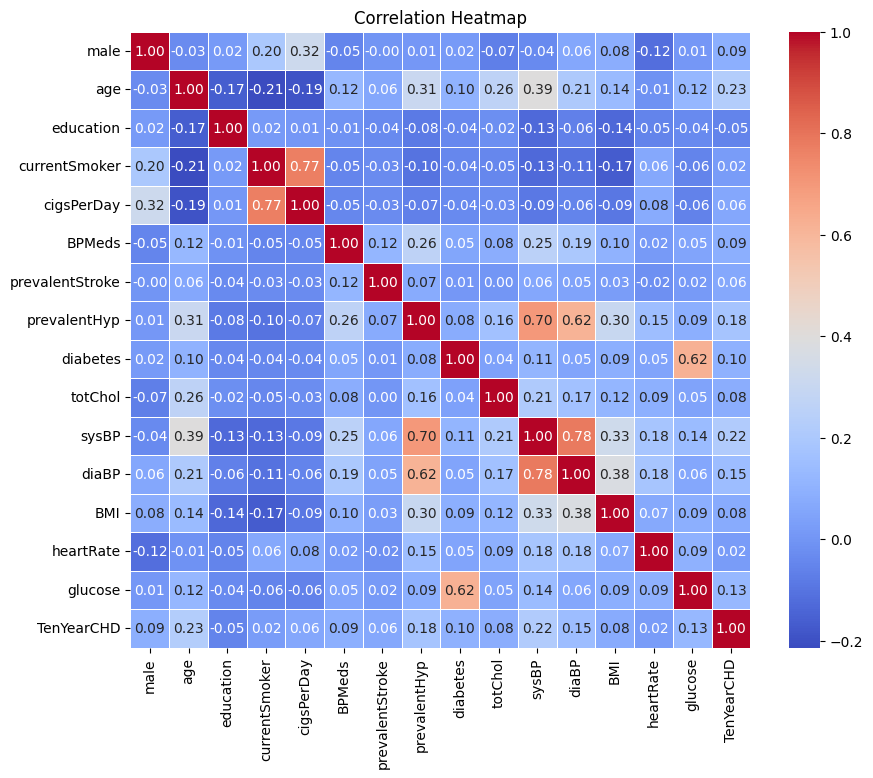

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
classification_df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
classification_df = classification_df.drop(columns ='glucose',axis=1)

In [10]:
classification_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0


In [11]:
classification_df['education'] = classification_df['education'].fillna(classification_df['education'].mean())
classification_df['cigsPerDay'] = classification_df['cigsPerDay'].fillna(classification_df['cigsPerDay'].mean())
classification_df['totChol'] = classification_df['totChol'].fillna(classification_df['totChol'].mean())
classification_df['BMI'] = classification_df['BMI'].fillna(classification_df['BMI'].mean())
classification_df['BPMeds'] = classification_df['BPMeds'].fillna(classification_df['BPMeds'].mode()[0])

In [12]:
classification_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4237.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.026596,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,1.000000


In [13]:
classification_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
TenYearCHD         0
dtype: int64

In [15]:
classification_df['heartRate'] = classification_df['heartRate'].fillna(classification_df['heartRate'].mean())


In [16]:
classification_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0


In [17]:
classification_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,1.000000


In [24]:
classification_df = classification_df[classification_df['cigsPerDay']<=40]

In [26]:
classification_df.shape

(4161, 15)

In [27]:
classification_df['heartRate'].value_counts()

heartRate
75.0     555
80.0     379
70.0     297
60.0     231
85.0     222
        ... 
99.0       1
140.0      1
143.0      1
101.0      1
46.0       1
Name: count, Length: 74, dtype: int64

In [30]:
classification_df = classification_df[classification_df['heartRate'] <= 120]

In [31]:
classification_df.to_csv('Cleaned_data.csv')

In [33]:
X = classification_df.drop(columns='TenYearCHD')
y = classification_df['TenYearCHD']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.2)

In [38]:
scaler = StandardScaler()

In [39]:
classification = RandomForestClassifier()

In [40]:
pipe = make_pipeline(scaler,classification)

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [42]:
y_pred = pipe.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.838748495788207

In [44]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.98      0.91       700\n           1       0.42      0.06      0.11       131\n\n    accuracy                           0.84       831\n   macro avg       0.63      0.52      0.51       831\nweighted avg       0.78      0.84      0.78       831\n'

In [45]:
confusion_matrix(y_test,y_pred)

array([[689,  11],
       [123,   8]], dtype=int64)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'n_estimators':[0,100,200], 'max_depth':[None,10,20]}

In [48]:
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5)

In [49]:
grid_search.fit(X_train,y_train)

c:\Users\Vedika\Desktop\ML\Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vedika\Desktop\ML\Classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vedika\Desktop\ML\Classification\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Vedika\Desktop\ML\Classification\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [0, 100, 200]})

In [50]:
best_params = grid_search.best_params_

In [51]:
best_model = RandomForestClassifier(**best_params)

In [52]:
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred_grid = best_model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_grid)

0.8435619735258725